In [1]:
# Importing pandas
import pandas as pd

# Importing the course datasets 
diabetes = pd.read_csv('datasets/diabetes_clean.csv')
music = pd.read_csv('datasets/music_clean.csv')
advertising = pd.read_csv('datasets/advertising_and_sales_clean.csv')
telecom = pd.read_csv("datasets/telecom_churn_clean.csv")

### Indian Liver Patient Classification with K-Nearest Neighbor

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# import KNeighborsClassfier
from sklearn.neighbors import KNeighborsClassifier
# import train_test_split 
from sklearn.model_selection import train_test_split

# import iris dataset 
liver_disease = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
liver_disease.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# seperate features and target 
y = liver_disease['is_patient'].values 
X = liver_disease[['tot_proteins','albumin','direct_bilirubin','tot_bilirubin']]

# split into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)

# create a KNN classifier with 5 neighbors 
knn = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the training data 
knn.fit(X_train, y_train)

# print the accuracy 
print(knn.score(X_test, y_test))

0.7


In [4]:
# Create neighbors
neighbors = np.arange(1, 21)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
 {1: 0.9975786924939467, 2: 0.8184019370460048, 3: 0.7941888619854721, 4: 0.7917675544794189, 5: 0.8038740920096852, 6: 0.7481840193704601, 7: 0.7360774818401937, 8: 0.7409200968523002, 9: 0.7360774818401937, 10: 0.7215496368038741, 11: 0.7142857142857143, 12: 0.7191283292978208, 13: 0.7094430992736077, 14: 0.7263922518159807, 15: 0.711864406779661, 16: 0.7239709443099274, 17: 0.7142857142857143, 18: 0.7312348668280871, 19: 0.7288135593220338, 20: 0.7215496368038741} 
 {1: 0.6411764705882353, 2: 0.7058823529411765, 3: 0.6470588235294118, 4: 0.7, 5: 0.7, 6: 0.7352941176470589, 7: 0.6941176470588235, 8: 0.7176470588235294, 9: 0.7058823529411765, 10: 0.7058823529411765, 11: 0.6941176470588235, 12: 0.711764705882353, 13: 0.6882352941176471, 14: 0.6882352941176471, 15: 0.6823529411764706, 16: 0.711764705882353, 17: 0.7058823529411765, 18: 0.7235294117647059, 19: 0.7, 20: 0.7294117647058823}


In [5]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

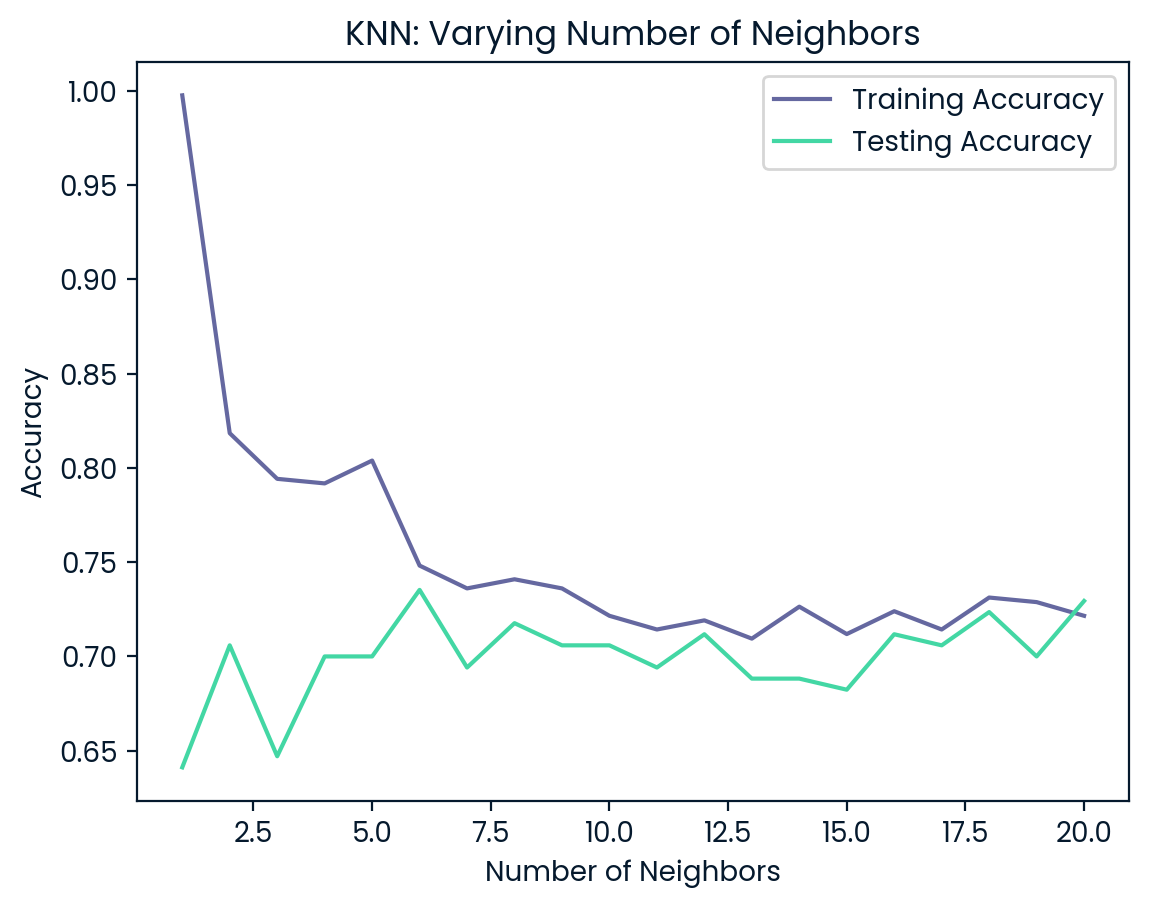

In [6]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, classification_report 

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117  10]
 [ 36   7]]
              precision    recall  f1-score   support

           1       0.76      0.92      0.84       127
           2       0.41      0.16      0.23        43

    accuracy                           0.73       170
   macro avg       0.59      0.54      0.53       170
weighted avg       0.68      0.73      0.68       170



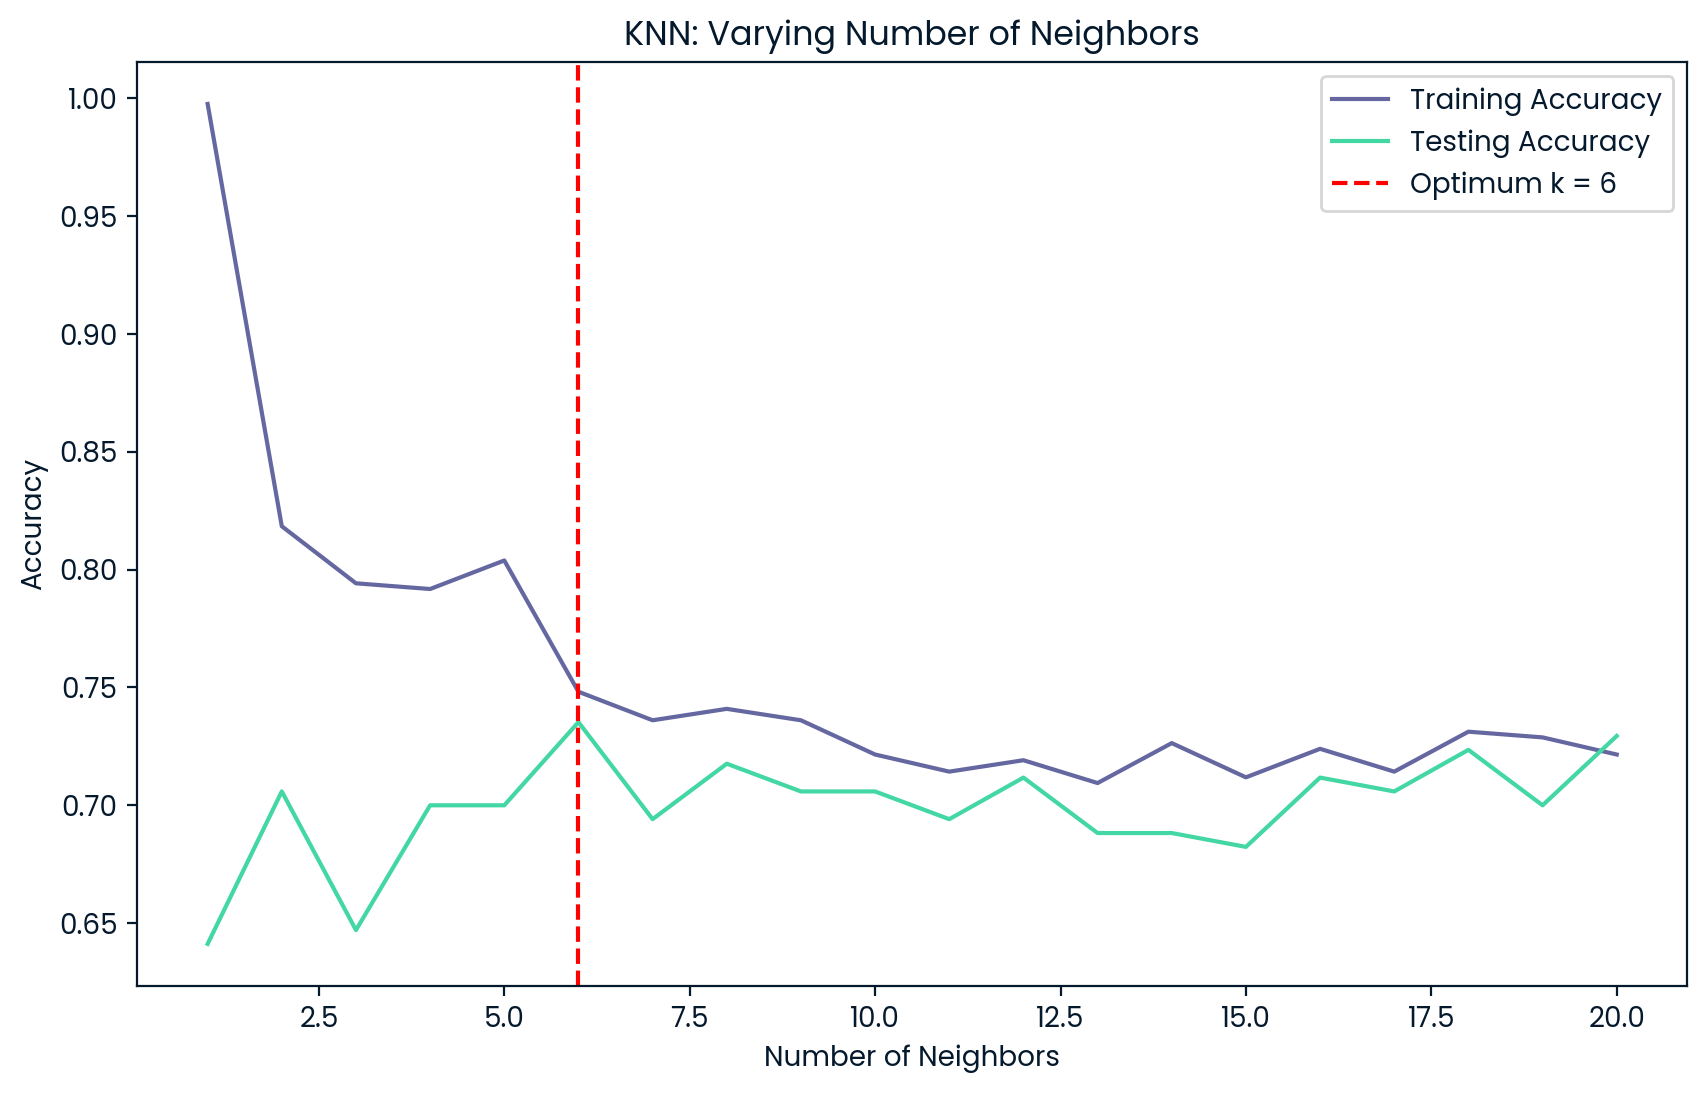

In [8]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Highlighting the optimum k
optimum_k = max(test_accuracies, key=test_accuracies.get)
plt.axvline(x=optimum_k, color='red', linestyle='--', label=f'Optimum k = {optimum_k}')
plt.legend()

plt.show()